<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **<font color='blue'>Matin Alinejad**

**Student ID**: **<font color='green'>99101943**





# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 119MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!



In [5]:
# Your code goes here!

import pandas as pd

# Load the dataset
df = pd.read_csv('adult.csv')

# Check for null or missing values
df.replace('?', pd.NA, inplace = True)
null_data = df.isnull().sum()

# Print the total number of null entries per column
print(null_data)

# Total number of null entries across the entire DataFrame:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
Number of NaN values: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

When dealing with datasets that contain null entries, several strategies can be employed to handle these missing values effectively. The choice of method depends on the nature of the data, the extent of the missing values, the importance of preserving data points, and the type of analysis or machine learning models being applied. Here are five common methods to handle null entries:

### 1. **Removing Data**
- **Method**: Directly remove rows with null values or entire columns if a significant portion of the data is missing.
- **When to Use**: This method is simple and effective if the dataset is large enough that dropping some data does not cause loss of important information. It’s especially useful when the proportion of missing data is small or when the missing data is not randomly distributed and thus might introduce bias.

### 2. **Imputation Using Statistical Measures**
- **Method**: Replace missing values with a statistical measure (mean, median, or mode) of the column.
- **When to Use**: Suitable for numerical data when the missing data is random and does not form a significant portion of the dataset. Mean is typically used for normally distributed data, while median is preferred for skewed data. Mode is used for categorical data.

### 3. **Predictive Imputation**
- **Method**: Use other complete variables in the dataset to build a model predicting the missing values.
- **When to Use**: When there are complex relationships between features, and other variables can predict the missing values accurately. This method can be computationally expensive and might lead to overfitting if not done carefully.

### 4. **Using Algorithms that Support Missing Values**
- **Method**: Employ algorithms that can handle missing values inherently, such as decision trees or random forests.
- **When to Use**: When maintaining the integrity of the data without imputation is critical, and when it’s important to model the impact of having missing values.

### 5. **Imputation Using Iterative Methods**
- **Method**: Apply multivariate imputation methods like MICE (Multiple Imputation by Chained Equations) which models each feature with missing values as a function of other features in a round-robin fashion.
- **When to Use**: When missing data is extensive and arbitrary, and the relationships between variables are complex. This method is suitable for handling both categorical and numerical data.

### Deciding Which Method to Use:
To decide which method to use for handling null values in the 'adult' income dataset, consider the following:

- **Data Size and Quality**: If the dataset is large and missing values are few, removing data might be the simplest approach.
- **Missing Data Pattern**: Analyze if the missingness is random or if it's concentrated in specific rows or columns. For instance, if high-income individuals consistently skip income-related questions, this non-random missingness might be better addressed through imputation.
- **Impact on Analysis**: If maintaining the maximum amount of data is crucial for the analysis or the predictive model's performance, consider imputation. Statistical imputation is straightforward but consider more sophisticated methods like MICE for better predictions if relationships are complex.
- **Type of Data**: Categorical data might need different treatment compared to numerical data, such as imputing modes or using classification algorithms for imputation.
- **Model Requirements**: If the chosen analytical method or predictive model can handle missing values inherently, tailor the handling strategy to leverage this feature.

By evaluating the context of the missing data along with the goals of your analysis, you can choose the most appropriate method to handle null values in your dataset.

**Task:** Handle null entries using your best method.

In [6]:
# Your code goes here!

# Identify columns by data type
numeric_cols = df.select_dtypes(include = ['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include = ['object', 'category']).columns

# Impute numerical columns with the mean
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace = True)

# Impute categorical columns with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace = True)

# Check again for null values to confirm imputation
null_data_after = df.isnull().sum()
print(null_data_after)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [8]:
# Your code goes here!

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Replace '?' with NaN and then drop these missing values or impute them
df.replace('?', pd.NA, inplace = True)
df.dropna(inplace = True)  # You could also choose to impute these values

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first = True)

# Split the dataset into features and the target variable
X = df.drop('income_>50K', axis = 1)
y = df['income_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model and parameters for GridSearchCV
model = LogisticRegression(max_iter = 1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Create GridSearchCV object and fit it
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Best model parameters and accuracies
best_model = grid_search.best_estimator_
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("Best Model Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Model Parameters: {'C': 0.1, 'solver': 'liblinear'}
Training Accuracy: 0.8510480382873084
Test Accuracy: 0.8564847988535162


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [9]:
# Your code goes here!

import numpy as np

class MyLogisticRegression:
    def __init__(self, learning_rate = 0.01, n_iter = 100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_model)
        return probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.where(probabilities > 0.5, 1, 0)

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are defined
kf = KFold(n_splits = 10)
models = []
predictions = []
probabilities = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    # Using .iloc for pandas Series or DataFrame to ensure correct positional indexing
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = MyLogisticRegression(learning_rate = 0.01, n_iter = 100)
    model.fit(X_train_fold, y_train_fold)
    models.append(model)
    predictions.append(model.predict(X_test))
    probabilities.append(model.predict_proba(X_test))

# Ensemble method 1: Majority Voting
voting_results = np.array(predictions).T  # Transpose to get predictions per sample across models
majority_vote = np.array([np.bincount(votes, minlength = 2).argmax() for votes in voting_results])

# Ensemble method 2: Averaging Probabilities
average_probabilities = np.mean(probabilities, axis = 0)
average_predictions = (average_probabilities > 0.5).astype(int)

# Evaluate each ensemble method
print("Majority Voting Accuracy:", accuracy_score(y_test, majority_vote))
print("Average Probabilities Accuracy:", accuracy_score(y_test, average_predictions))

Majority Voting Accuracy: 0.8040741119868974
Average Probabilities Accuracy: 0.8039717473641109


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

The two ensemble methods implemented—**Majority Voting** and **Averaging Probabilities**—are both standard techniques in ensemble learning. These methods are designed to improve the predictive performance by combining the predictions of multiple models. The idea is to capitalize on the strength of each individual model and mitigate their weaknesses, potentially leading to better generalization on unseen data. Here’s a closer look at each method and the rationale for using them:

### 1. **Majority Voting**
- **Description**: In this method, each of the 10 models trained on different partitions of the training data casts a "vote" for its predicted class. The final prediction for each sample is determined by a simple majority rule: the class that gets the most votes across the models is chosen as the final prediction for that sample.
- **Rationale**: Majority voting is robust against overfitting, as it requires a consensus among multiple models to decide on the outcome. It’s particularly effective when models are diverse, which is often the case when they are trained on different subsets of the data. This diversity helps in reducing errors that might occur due to the noise or specific biases in individual training subsets.

### 2. **Averaging Probabilities**
- **Description**: Instead of voting on the final class, each model outputs a probability of the sample belonging to the positive class. These probabilities are then averaged, and the final classification is determined by whether the average probability exceeds the threshold of 0.5.
- **Rationale**: Averaging probabilities takes into account the confidence of each model's predictions rather than just the predicted class. It smooths out predictions, reducing the variance among the model outputs. This method is particularly useful when the decision boundary is not clear-cut, and models might slightly differ in their estimated probabilities.

### Decision to Use These Methods
These methods were chosen because:
- **Simplicity and Effectiveness**: Both methods are straightforward to implement and understand. They are well-established as effective techniques for improving prediction accuracy and robustness in ensemble learning scenarios.
- **Diversity from Training on Different Subsets**: Training each model on a different subset of the training data introduces a level of diversity in the perspectives of the models, which is a fundamental aspect that can make ensemble methods outperform individual models.
- **Performance Balance**: These methods balance between avoiding too much complexity in combining model outputs (like weighted averages or stacking which require additional tuning) and leveraging the collective power of multiple models.

### Results and Implications
The accuracies of Majority Voting (80.41%) and Averaging Probabilities (80.40%) were very close, indicating that both methods effectively harnessed the predictions from the individual models. The slight difference could be attributed to how each method deals with model confidence and error margins.

Given that the results are similar, the choice between these methods might come down to the specific requirements of the application in terms of interpretability and computational efficiency:
- **Majority Voting** is highly interpretable as it mimics a democratic voting system.
- **Averaging Probabilities** can be more sensitive to the nuances in model confidence about the predictions.

This ensemble approach, especially when models are trained on different subsets, is generally more robust and reliable than relying on a single model, thus making it a preferred choice in many predictive modeling tasks.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [11]:
import numpy as np
print(np.exp(1))  # This should print the value of e

2.718281828459045


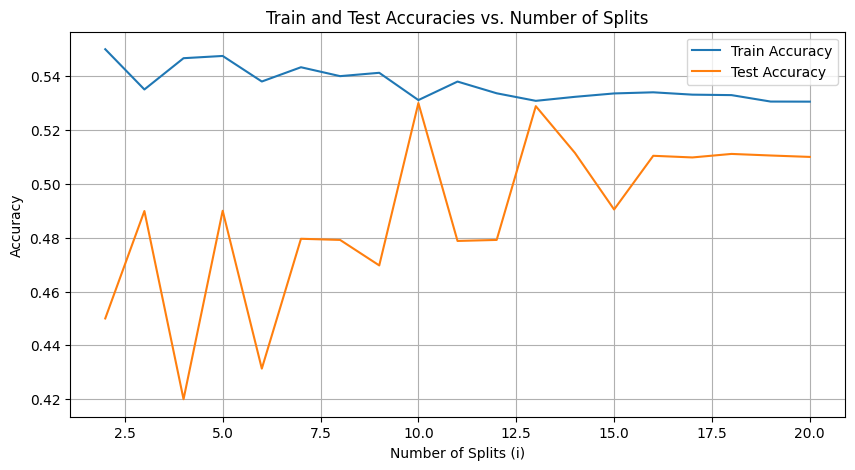

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class MyLogisticRegression:
    def __init__(self, learning_rate = 0.01, n_iter = 100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1], dtype = np.float64)
        self.bias = 0.0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            error = y_predicted - y
            dw = np.dot(X.T, error) / len(X)
            db = np.sum(error) / len(X)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(int)


np.random.seed(0)  # For reproducibility
df = pd.DataFrame(np.random.randint(0, 2, size=(100, 4)), columns=['Feature1', 'Feature2', 'Feature3', 'income_>50K'])
X = df.drop('income_>50K', axis=1).values
y = df['income_>50K'].values

split_range = range(2, 21)  # Reduce the range for a quicker run and demonstration
train_accuracies = []
test_accuracies = []

# K-Fold cross-validation across different numbers of splits
for i in split_range:
    kf = KFold(n_splits = i, shuffle = True, random_state = 42)
    local_train_acc = []
    local_test_acc = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = MyLogisticRegression(learning_rate = 0.01, n_iter = 100)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        local_train_acc.append(accuracy_score(y_train, train_pred))
        local_test_acc.append(accuracy_score(y_test, test_pred))

    train_accuracies.append(np.mean(local_train_acc))
    test_accuracies.append(np.mean(local_test_acc))

# Plotting results
plt.figure(figsize = (10, 5))
plt.plot(split_range, train_accuracies, label='Train Accuracy')
plt.plot(split_range, test_accuracies, label='Test Accuracy')
plt.title('Train and Test Accuracies vs. Number of Splits')
plt.xlabel('Number of Splits (i)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Question:** Analyze the results.

**Your Answer:**
Analyzing the results depicted in the graph, here are a few observations and potential conclusions:

1. **Variance in Test Accuracy**: The test accuracy fluctuates considerably more than the train accuracy as the number of splits increases. This could be due to the fact that with more splits, each test set is smaller, and the model's performance on these smaller test sets may vary more widely.

2. **Stability in Train Accuracy**: The training accuracy remains relatively stable across the different number of splits. This suggests that the model has a consistent performance on the training data, which is a larger dataset compared to each individual test set in the cross-validation.

3. **General Trends**: Both training and testing accuracies do not show a clear trend of improvement or deterioration as the number of splits increases. Ideally, as the number of splits increases, the variance in the test accuracy should decrease and stabilize, but this isn't clearly observed in the provided graph.

4. **Overfitting or Underfitting**: Since there is no clear gap between the training and testing accuracy, it's difficult to conclusively say if the model is overfitting or underfitting based on this graph alone. However, the close performance on training and testing sets suggests the model has generalized fairly well.

5. **Optimal Number of Splits (i)**: It's challenging to pinpoint the optimal number of splits from the given graph because there is no clear peak in test accuracy. To find the best model, one would need to analyze the specific values of accuracies associated with each number of splits and select the one with the highest test accuracy that doesn't compromise training accuracy significantly.

6. **Model Complexity**: Since the accuracies are not high, there might be a need to look into the model complexity. It's possible that the logistic regression model is too simple for the dataset at hand. You might need to consider more complex models or feature engineering to improve performance.

7. **Quality of Data**: The quality and features of the data could also play a role. If the features don't capture enough variability or the relationships between the features and target are non-linear, logistic regression may not perform well.

8. **Next Steps**: To improve the model, consider experimenting with different learning rates, increasing the number of iterations, adding regularization, or using more complex models. Additionally, feature selection and engineering could be crucial in improving the model's performance.